# Symbolic Regression with 10 generation Limit

This is the default symbolic regression with the generation limit set to 10

In [1]:
#loading packages & dependencies
#When the %pylab magic function is entered at the IPython prompt, it triggers the import of various modules within Matplotlib.
%pylab inline 
from gplearnmod.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
import graphviz

Populating the interactive namespace from numpy and matplotlib


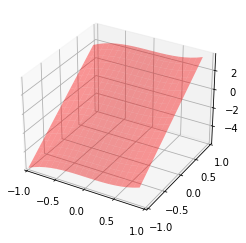

In [2]:
# Ground truth
x0 = np.arange(-1, 1, .1)
x1 = np.arange(-1, 1, .1)
x0, x1 = np.meshgrid(x0, x1)
y_truth = x0**3+ 4*x1 - 0.75 #true function

ax = plt.figure().gca(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xticks(np.arange(-1, 1.01, .5))
ax.set_yticks(np.arange(-1, 1.01, .5))
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1, color='red', alpha=0.4)
plt.show()

In [3]:
rng = check_random_state(0)

# Training samples
X_train = rng.uniform(-1, 1, 100).reshape(50, 2)
y_train = X_train[:, 0]**3+ 4*X_train[:, 1] - 0.75

# Testing samples|
X_test = rng.uniform(-1, 1, 100).reshape(50, 2)
y_test = X_test[:, 0]**3+ 4*X_test[:, 1] - 0.75

In [4]:
est_gp = SymbolicRegressor(population_size=5000, #the number of programs in each generation
                           generations=10, stopping_criteria=0.01, #The required metric value required in order to stop evolution early.
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, #0.05, The probability of performing hoist mutation on a tournament winner. Hoist mutation takes the winner of a tournament and selects a random subtree from it. A random subtree of that subtree is then selected and this is ‘hoisted’ into the original subtrees location to form an offspring in the next generation. This method helps to control bloat.
                           p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.13          459.188       25         0.434331         0.506694     38.33s
   1    11.59          2.38908       51         0.240454         0.424414     21.15s
   2    13.63          2.59245       21         0.178287         0.169132     18.79s
   3    15.22          1.46837       25         0.163968          0.22371     16.68s
   4    13.55          1.27308       15         0.143164          0.22901     13.43s
   5    10.63          1.25303       19         0.147842          0.16348     10.38s
   6     9.63          1.39405       19         0.145624         0.183435      7.73s
   7     9.22          2.09328       15          0.14561         0.206999      5.00s
   8     8.17          1.58802       21         0.143603         0.165144  

SymbolicRegressor(generations=10, max_samples=0.9, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0.01,
                  population_size=5000, random_state=0, stopping_criteria=0.01,
                  verbose=1)

In [5]:
sim = simplify(str(est_gp._program))
print(sim)

add(add(X1, mul(X0, 0.716)), add((1.03092783505155*X1, 0), add(add(X1, X1), -0.735)))


In [6]:
print(est_gp._program)

add(add(X1, mul(X0, 0.716)), add(div(X1, 0.970), add(add(X1, X1), -0.735)))


In [7]:
sim = simplify(str(est_gp._program))
print(sim)

add(add(X1, mul(X0, 0.716)), add((1.03092783505155*X1, 0), add(add(X1, X1), -0.735)))


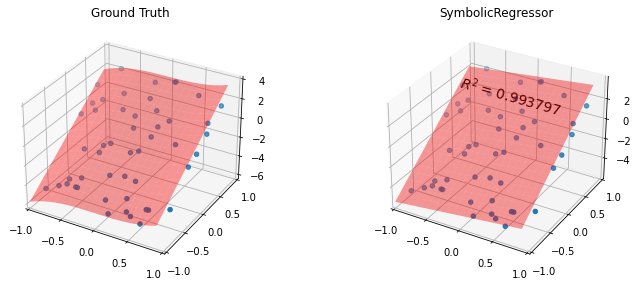

In [8]:
y_gp = est_gp.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_gp = est_gp.score(X_test, y_test)
#y_tree = est_tree.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
#score_tree = est_tree.score(X_test, y_test)
#y_rf = est_rf.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
#score_rf = est_rf.score(X_test, y_test)

fig = plt.figure(figsize=(12, 10))

for i, (y, score, title) in enumerate([(y_truth, None, "Ground Truth"),
                                       (y_gp, score_gp, "SymbolicRegressor")]):
                                       #(y_tree, score_tree, "DecisionTreeRegressor"),
                                       #(y_rf, score_rf, "RandomForestRegressor")]):

    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xticks(np.arange(-1, 1.01, .5))
    ax.set_yticks(np.arange(-1, 1.01, .5))
    surf = ax.plot_surface(x0, x1, y, rstride=1, cstride=1, color='red', alpha=0.4)
    points = ax.scatter(X_train[:, 0], X_train[:, 1], y_train)
    if score is not None:
        score = ax.text(-.7, 0.1, .1, "$R^2 =\/ %.6f$" % score, 'x', fontsize=14)
    plt.title(title)

plt.show()